In [45]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [44]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn import tree 
import graphviz # 트리 그래픽

# 데이터 경로
file_path = "/gdrive/MyDrive/machine learning/PlayTennis.csv"
# 데이터 경로로부터 파일을 읽음 (pandas 라이브러리 사용)
datas = pd.read_csv(file_path)

# 데이터 출력 (데이터 형태 확인)
print(datas)

     outlook  temp humidity  windy  day      time play  Unnamed: 7
0      sunny   hot     high  False  Sun  12-30-30   no         NaN
1      sunny   hot     high   True  Mon  14-20-30   no         NaN
2   overcast   hot     high  False  Tue  13-10-00  yes         NaN
3      rainy  mild     high  False  Wed  15-30-00  yes         NaN
4      rainy  cool   normal  False  Thu  16-30-00  yes         NaN
5      rainy  cool   normal   True  Fri  18-00-00   no         NaN
6   overcast  cool   normal   True  Sat  19-00-00  yes         NaN
7      sunny  mild     high  False  Wed  18-30-30   no         NaN
8      sunny  cool   normal  False  Thu  17-20-30  yes         NaN
9      rainy  mild   normal  False  Fri  19-30-30  yes         NaN
10     sunny  mild   normal   True  Sat  12-10-00  yes         NaN
11  overcast  mild     high   True  Mon  13-30-30  yes         NaN
12  overcast   hot   normal  False  Tue  14-00-00  yes         NaN
13     rainy  mild     high   True  Wed  15-00-00   no        

In [ ]:
# 이상한? 열이 들어 있어서 삭제
datas = datas.drop(['Unnamed: 7'], axis=1)

# 연속 자질 time과 복잡한 자질 day로 엔트로피가 높게 측정되는 것을 막기 위함으로
# time을 12-00-00 ~ 14-59-59 lunchtime "점심시간"
# 15-00-00 ~ 17-59-59 afternoon "오후"
# 18-00-00 ~ 20-59-59 night "저녁, 밤" 분류
# day를 mon, tue > first "주의 시작"
# wed, thu > second "주의 중간"
# fri, sat, sun을 last로 분류 "주의 마지막이자 휴일" 분류

for i in range(datas.shape[0]):
  time =  datas.iloc[i]['time']
  time = int(time[0:2])
  day = datas.iloc[i]['day']
  if day == 'Mon' or day == 'Tue':
    datas.iat[i,4] = 'first'
  if day == 'Wed' or day == 'Thu':
    datas.iat[i,4] = 'second'
  if day == 'Fri' or day == 'Sat' or day == 'Sun':
    datas.iat[i,4] = 'last'
  if time >= 12 and time < 15:
    datas.iat[i,5] = 'lunchtime'
  elif time >= 15 and time < 18:
    datas.iat[i,5] = 'afternoon'
  elif time >= 18 and time < 21:
    datas.iat[i,5] = 'night'

# 데이터 출력 (데이터 형태 확인)
print(datas)

In [39]:
# 범주형 데이터를 수치형 데이터로 자동 변환해주는 라이브러리
label_encoder = LabelEncoder()

# 정답 클래스 이름 (yes, no)
# pandas 형태의 datas 사용
target_names = label_encoder.fit(datas['play']).classes_
print("target_names : {}".format(target_names))

datas['outlook'] = label_encoder.fit_transform(datas['outlook'])
datas['temp'] = label_encoder.fit_transform(datas['temp'])
datas['humidity'] = label_encoder.fit_transform(datas['humidity'])
datas['windy'] = label_encoder.fit_transform(datas['windy'])
datas['day'] = label_encoder.fit_transform(datas['day'])
datas['time'] = label_encoder.fit_transform(datas['time'])
datas['play'] = label_encoder.fit_transform(datas['play'])

# 데이터 출력 (데이터 포맷 변환 후 결과 확인)
print(datas)

target_names : ['no' 'yes']
    outlook  temp  humidity  windy  day  time  play
0         2     1         0      0    1     1     0
1         2     1         0      1    0     1     0
2         0     1         0      0    0     1     1
3         1     2         0      0    2     0     1
4         1     0         1      0    2     0     1
5         1     0         1      1    1     2     0
6         0     0         1      1    1     2     1
7         2     2         0      0    2     2     0
8         2     0         1      0    2     0     1
9         1     2         1      0    1     2     1
10        2     2         1      1    1     1     1
11        0     2         0      1    0     1     1
12        0     1         1      0    0     1     1
13        1     2         0      1    2     0     0


In [40]:
# 입력 데이터와 정답 데이터로 분리
# drop은 지우라는 뜻 axis는 기준이 되는 축
x_data, y_data = datas.drop(['play'], axis=1), datas['play'] 

# 분리 결과 확인
print(x_data)
print()
print(y_data)

    outlook  temp  humidity  windy  day  time
0         2     1         0      0    1     1
1         2     1         0      1    0     1
2         0     1         0      0    0     1
3         1     2         0      0    2     0
4         1     0         1      0    2     0
5         1     0         1      1    1     2
6         0     0         1      1    1     2
7         2     2         0      0    2     2
8         2     0         1      0    2     0
9         1     2         1      0    1     2
10        2     2         1      1    1     1
11        0     2         0      1    0     1
12        0     1         1      0    0     1
13        1     2         0      1    2     0

0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: play, dtype: int64


In [41]:
# Decision tree 모델 학습 ()
decision_tree = tree.DecisionTreeClassifier(criterion = 'entropy')
train_result = decision_tree.fit(x_data, y_data)

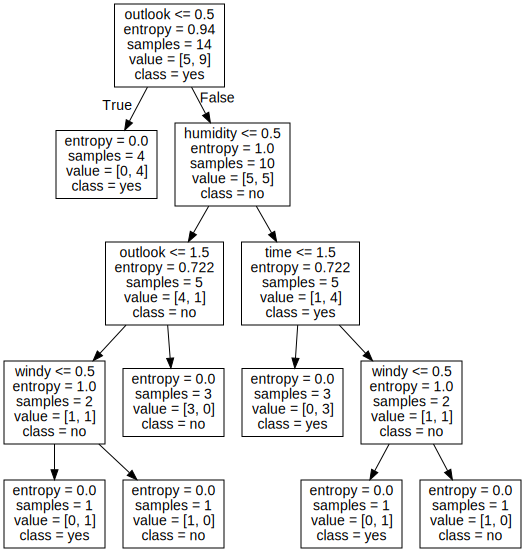

In [42]:
# 학습 결과 확인 (graphviz 라이브러리 사용)
graph = graphviz.Source(tree.export_graphviz(train_result, out_file=None,
                                             feature_names=x_data.columns,
                                             class_names=target_names)) 
graph

In [43]:
# 학습한 모델을 사용하여 예측
predict_result = decision_tree.predict(x_data)

# 예측 결과 출력 (실제 정답을 맞춘 경우 True로 표시됨)
print(predict_result == y_data)

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
Name: play, dtype: bool


# 새 섹션